In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [127]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [128]:
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [129]:
df.duplicated().sum()

1

In [130]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [131]:
df.drop_duplicates(inplace=True)

In [132]:
df.duplicated().sum()

0

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


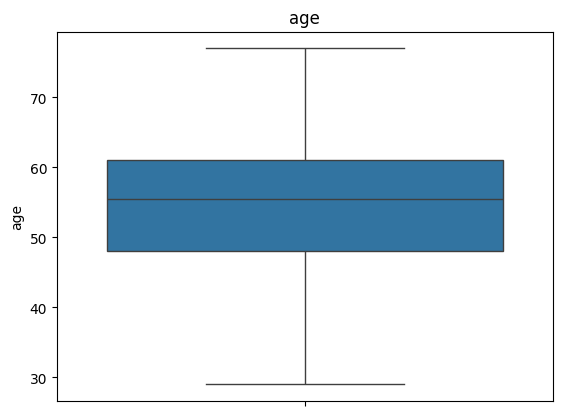

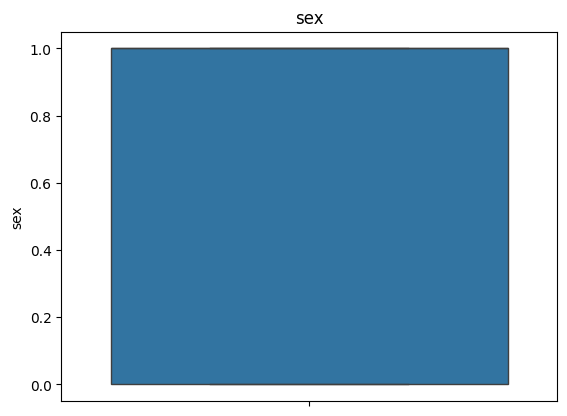

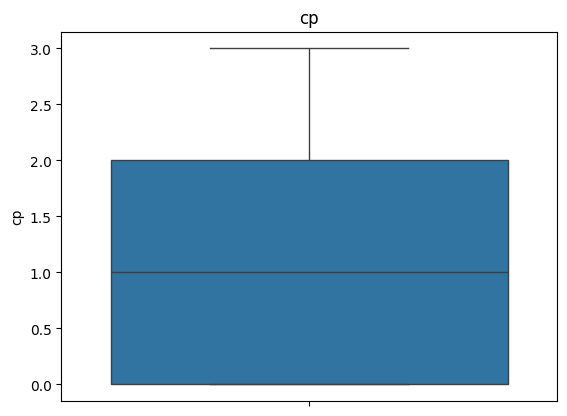

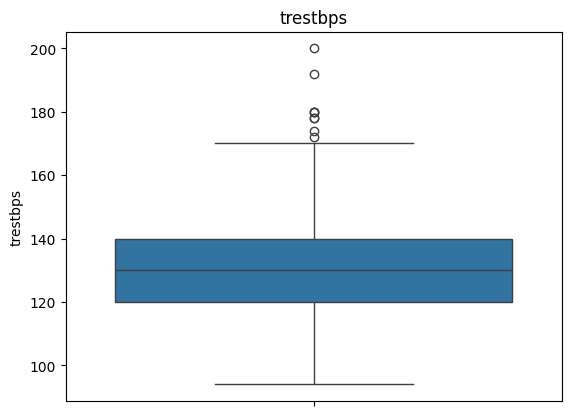

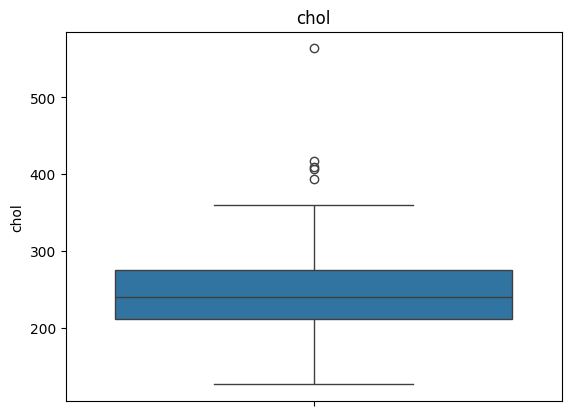

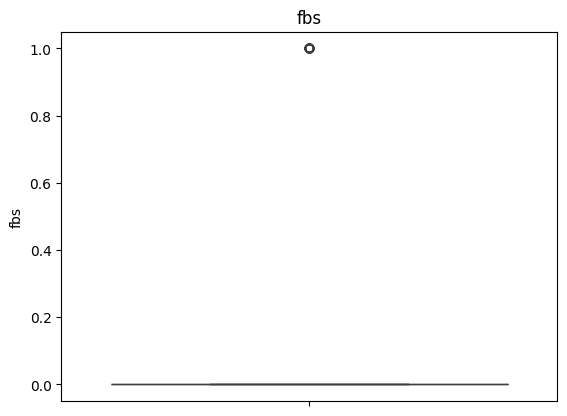

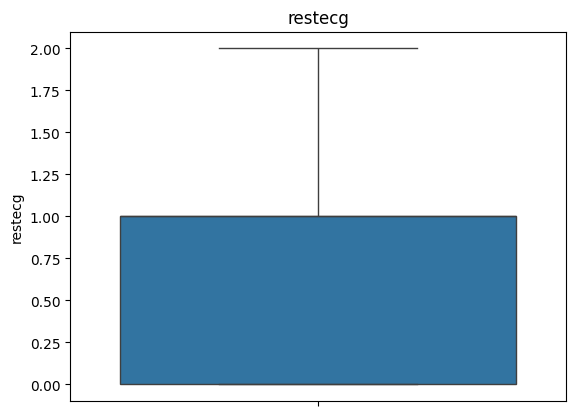

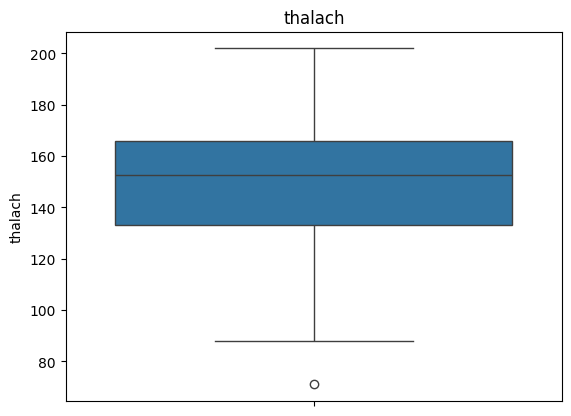

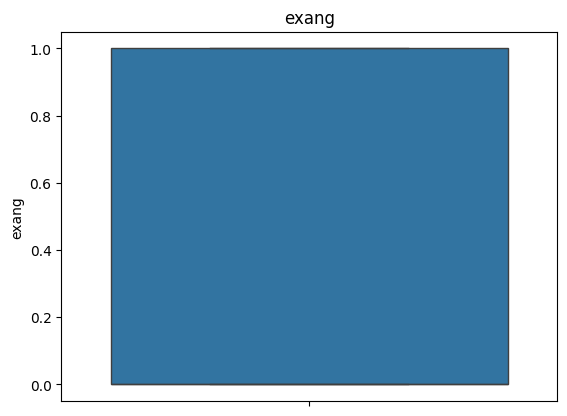

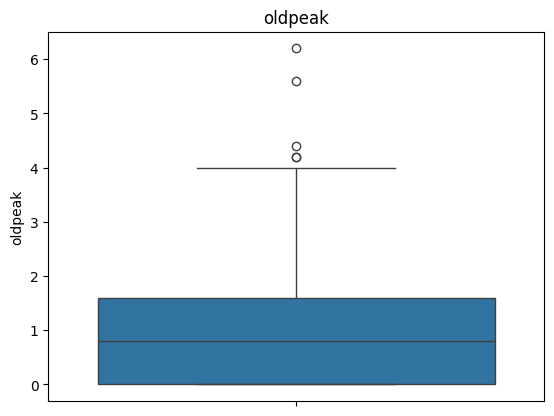

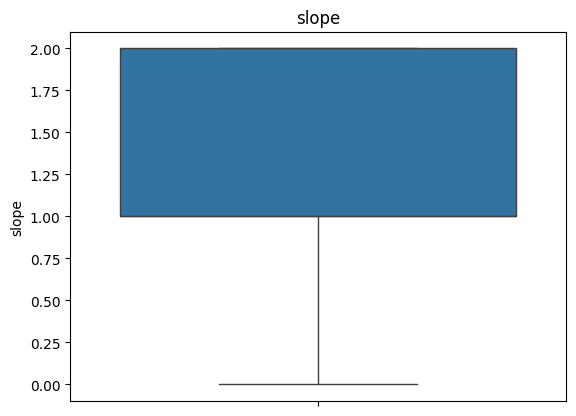

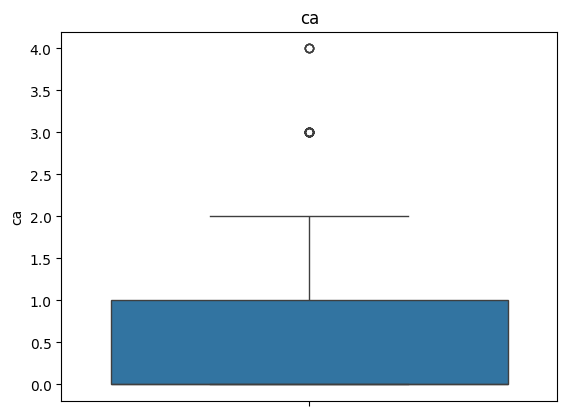

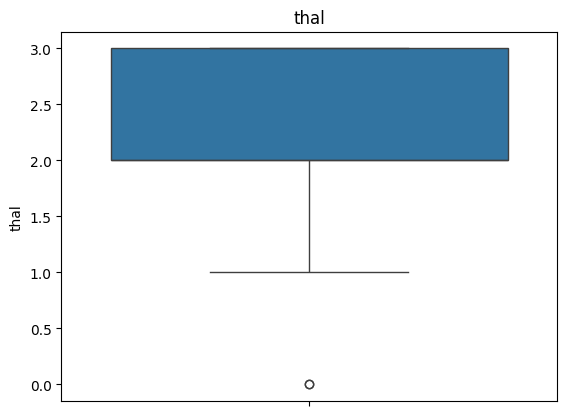

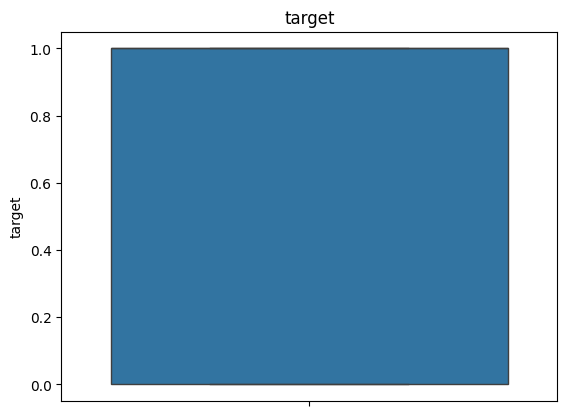

In [15]:
for col in df.columns:
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

Model Building
1. splitting the data
2. model importation
3. Train the model
4. evaluate the model
5. check the accuracy of the model
6. hyperparameter tuning

In [16]:
from inspect import modulesbyfile

In [17]:
x=df.iloc[:,:-1]
y=df['target']

In [18]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [19]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


**1. SPLITTING THE DATA**

In [20]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=70)

In [94]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3
208,49,1,2,120,188,0,1,139,0,2.0,1,3,3
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2


In [76]:
y_train

,target
296,0
298,0
232,0
270,0
142,1
...,...
245,0
25,1
280,0
32,1


**2. MODEL IMPORTATION**

In [95]:

from sklearn.tree import DecisionTreeClassifier

In [109]:
model=DecisionTreeClassifier(random_state=70)

**3.TRAIN THE MODEL**

In [110]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=70)

**4.EVALUATE THE MODEL**

In [111]:
y_pred=model.predict(x_test)

In [112]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1])

In [113]:
y_test

,target
112,1
12,1
268,0
58,1
142,1
...,...
124,1
188,0
204,0
228,0


**5.ACCURACY OF THE MODEL**

In [114]:
from sklearn.metrics import *
accuracy_score(y_pred,y_test)

0.7802197802197802

In [115]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1])

**6.HYPERPARAMETER TUNING**

In [116]:
cf=confusion_matrix(y_pred,y_test)
cf

array([[31, 10],
       [10, 40]])

<Axes: >

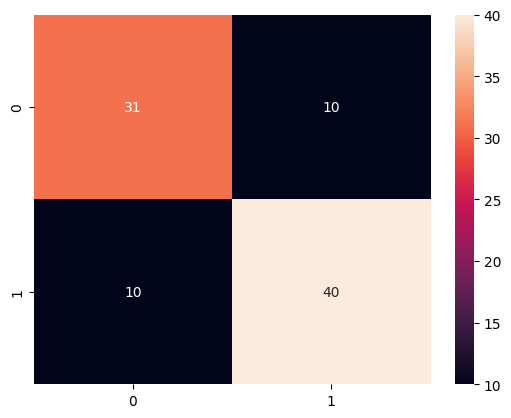

In [117]:
sns.heatmap(cf,annot=True)

In [119]:
depth = [1,2,3,4,5,6,7,8,9,10]
for max_d in depth:
  model = DecisionTreeClassifier(max_depth=max_d,random_state=70)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  print(f"max_depth of : {max_d} is {acc}")

max_depth of : 1 is 0.7362637362637363
max_depth of : 2 is 0.7472527472527473
max_depth of : 3 is 0.8021978021978022
max_depth of : 4 is 0.7912087912087912
max_depth of : 5 is 0.7692307692307693
max_depth of : 6 is 0.7582417582417582
max_depth of : 7 is 0.7912087912087912
max_depth of : 8 is 0.7692307692307693
max_depth of : 9 is 0.7802197802197802
max_depth of : 10 is 0.7802197802197802


In [120]:
final_model=DecisionTreeClassifier(max_depth=3,random_state=70)
final_model.fit(x_train,y_train)
y_pred=final_model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc*100

80.21978021978022

In [121]:
confusion_matrix(y_test,y_pred)

array([[30, 11],
       [ 7, 43]])

<Axes: >

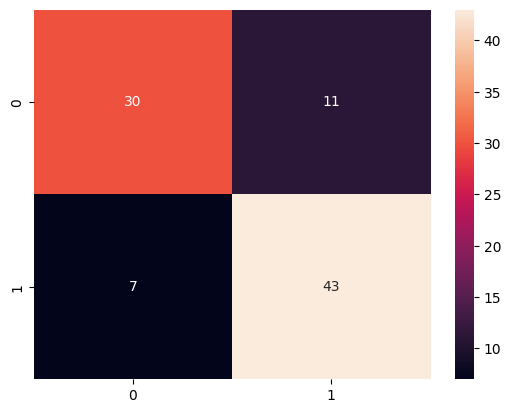

In [122]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

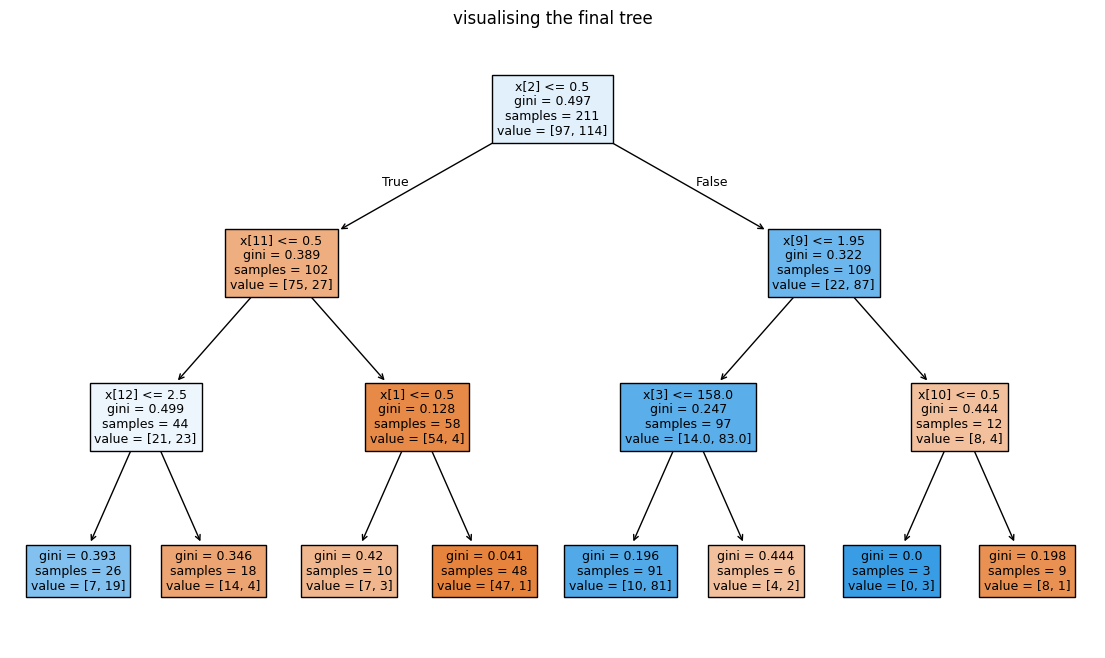

In [124]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,8))
plot_tree(final_model,filled=True)
plt.title("visualising the final tree")
plt.show()

In [136]:
# On comparing the accuracy values with logistic regression using the decision tree

In [135]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8351648351648352

In [ ]:
# so by this we can say that logistic regression is more better than decisiontree